## import & load

In [43]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [44]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [78]:
import data.read
importlib.reload(data.read)
import data.okx.read
importlib.reload(data.okx.read)

<module 'data.okx.read' from '/home/junlim/projects/jitter_recovery/data/okx/read.py'>

In [104]:
#df = data.okx.read.df_okx_20231201_1231.dropna()
#df = data.okx.read.df_okx_20240101_0131.dropna()
df = data.okx.read.df_okx_20240229_0302.dropna()
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])
all_symbols = df.symbol.unique()

In [105]:
df.head(2)

,timestamp,symbol,open,high,low,close,volume
0,2024-02-29 05:00:00,1INCH-USD-SWAP,0.5124,0.5124,0.5124,0.5124,0.0
1,2024-02-29 05:00:00,CELO-USDT-SWAP,0.9481,0.9484,0.9466,0.9474,18032.0


In [106]:
df.tail(2)

,timestamp,symbol,open,high,low,close,volume
470764,2024-03-01 21:12:00,JTO-USDT-SWAP,2.5210,2.5210,2.5170,2.5170,5614.0
470765,2024-03-01 21:12:00,SUSHI-USDT-SWAP,1.5964,1.5985,1.5964,1.5985,1285.0


In [107]:
all_symbols = [s for s in all_symbols if s]

In [108]:
len([s for s in all_symbols if 'USDT' in s])

173

## multiple symbols

In [178]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [193]:
feature_param = algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(60)

In [194]:
dfst_feature = algo.jitter_recovery.research.get_dfst_feature(df, feature_param)

0 symbol: CELO-USDT-SWAP (feature)
1 symbol: GMT-USDT-SWAP (feature)
2 symbol: BICO-USDT-SWAP (feature)
3 symbol: JST-USDT-SWAP (feature)
4 symbol: GFT-USDT-SWAP (feature)
5 symbol: CEL-USDT-SWAP (feature)
6 symbol: RACA-USDT-SWAP (feature)
7 symbol: API3-USDT-SWAP (feature)
8 symbol: ORBS-USDT-SWAP (feature)
9 symbol: GRT-USDT-SWAP (feature)
10 symbol: ANT-USDT-SWAP (feature)
11 symbol: CORE-USDT-SWAP (feature)
12 symbol: XLM-USDT-SWAP (feature)
13 symbol: AR-USDT-SWAP (feature)
14 symbol: BLUR-USDT-SWAP (feature)
15 symbol: NEAR-USDT-SWAP (feature)
16 symbol: PEOPLE-USDT-SWAP (feature)
17 symbol: ENS-USDT-SWAP (feature)
18 symbol: DYDX-USDT-SWAP (feature)
19 symbol: WLD-USDT-SWAP (feature)
20 symbol: BADGER-USDT-SWAP (feature)
21 symbol: TRB-USDT-SWAP (feature)
22 symbol: MATIC-USDT-SWAP (feature)
23 symbol: CETUS-USDT-SWAP (feature)
24 symbol: CSPR-USDT-SWAP (feature)
25 symbol: BAT-USDT-SWAP (feature)
26 symbol: MEME-USDT-SWAP (feature)
27 symbol: BTC-USDT-SWAP (feature)
28 symbol:

In [195]:
dfst_feature[dfst_feature.ch_max > 0.1].index.get_level_values('symbol').unique().values

array(['PEOPLE-USDT-SWAP', 'SPELL-USDT-SWAP', 'SHIB-USDT-SWAP',
       'TURBO-USDT-SWAP', 'NEO-USDT-SWAP', 'AR-USDT-SWAP',
       'CETUS-USDT-SWAP', 'FLOKI-USDT-SWAP', 'ACH-USDT-SWAP',
       'BICO-USDT-SWAP', 'BONK-USDT-SWAP', 'STARL-USDT-SWAP',
       'USTC-USDT-SWAP', 'FITFI-USDT-SWAP', 'RACA-USDT-SWAP',
       'UNI-USDT-SWAP', 'FIL-USDT-SWAP', 'WAXP-USDT-SWAP',
       'RSR-USDT-SWAP', 'MANA-USDT-SWAP', 'OM-USDT-SWAP',
       'CELO-USDT-SWAP', 'FET-USDT-SWAP', 'YGG-USDT-SWAP',
       'AGIX-USDT-SWAP', 'ID-USDT-SWAP', 'PEPE-USDT-SWAP',
       'BADGER-USDT-SWAP', 'FLM-USDT-SWAP', 'OMG-USDT-SWAP',
       'GPT-USDT-SWAP', 'LOOKS-USDT-SWAP', 'MEME-USDT-SWAP'], dtype=object)

In [196]:
trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    feature_param, 
    0.20, -0.04, 0.02, is_long_term=False)

In [197]:
dfst_trading = algo.jitter_recovery.research.get_dfst_trading(df, dfst_feature, trading_param)

symbol_with_jumps: 7
0 symbol: TURBO-USDT-SWAP: 101
1 symbol: RACA-USDT-SWAP: 50
2 symbol: SPELL-USDT-SWAP: 29
3 symbol: BICO-USDT-SWAP: 35
4 symbol: PEPE-USDT-SWAP: 8
5 symbol: GPT-USDT-SWAP: 93
6 symbol: FLOKI-USDT-SWAP: 59


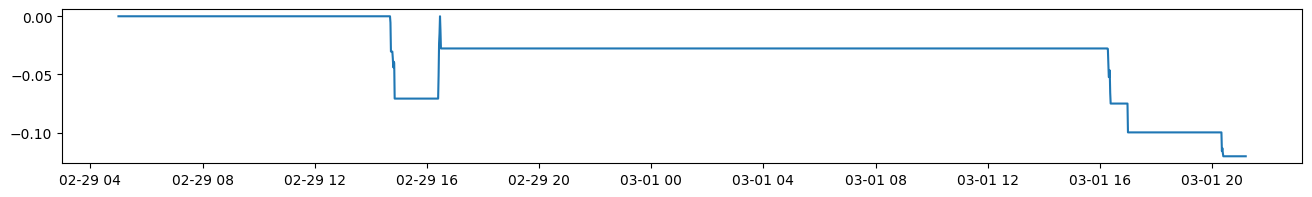

In [198]:
algo.jitter_recovery.research.investigate_trading(dfst_feature_approximate, dfst_trading)

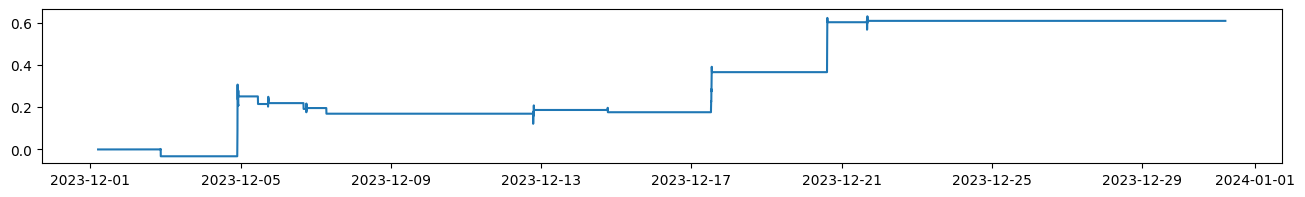

In [27]:
algo.jitter_recovery.research.investigate_trading(dfst_feature_approximate, dfst_trading)

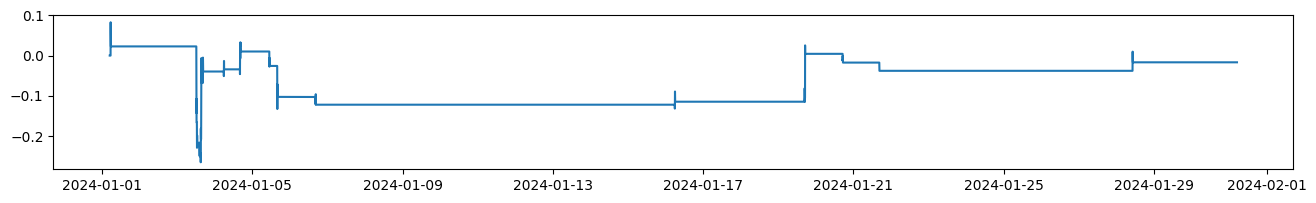

In [35]:
algo.jitter_recovery.research.investigate_trading(dfst_feature_approximate, dfst_trading)

<Axes: xlabel='timestamp'>

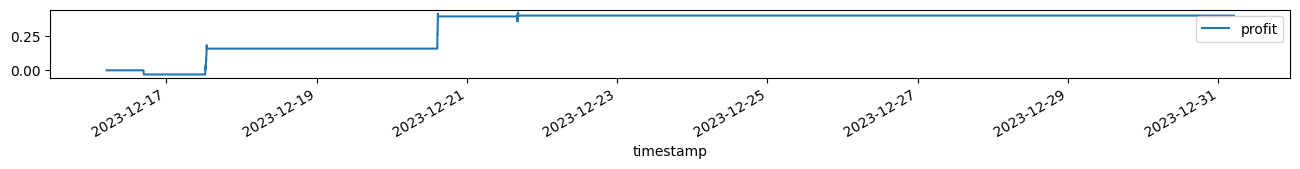

In [28]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(16,1))

<Axes: xlabel='timestamp'>

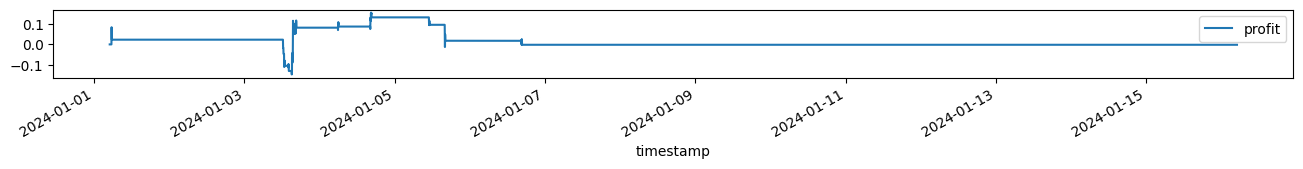

In [42]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(16,1))

<Axes: xlabel='timestamp'>

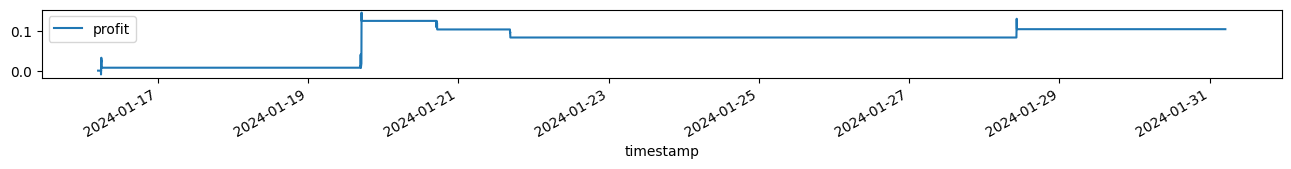

In [175]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(16,1))

In [192]:
dfst_trading[dfst_trading.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
TURBO-USDT-SWAP,-0.070777
GPT-USDT-SWAP,-0.024599
RACA-USDT-SWAP,0.043110


In [1]:
#dfst_feature.xs('FITFI-USDT-SWAP').loc['2023-12-07 16:38:00']

In [ ]:
dfst_trading[(dfst_trading.ch_max > 0.15) & (dfst_trading.ch_since_max < -0.01)]

In [ ]:
dfst_trading[(dfst_trading.ch_max > 0.15) & (dfst_trading.ch_since_max < 0)].loc[symbol_with_jumps[0]]

In [221]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-02-03 18:13:00, GAL-USDT-SWAP, 1.905, position_changed: 1.0
2024-02-03 19:18:00, GAL-USDT-SWAP, 1.852, position_changed: -1.0
2024-02-04 00:19:00, FITFI-USDT-SWAP, 0.006064, position_changed: 1.0
2024-02-04 00:31:00, FITFI-USDT-SWAP, 0.005904, position_changed: -1.0
2024-02-04 20:20:00, DMAIL-USDT-SWAP, 0.4964, position_changed: 1.0
2024-02-04 20:23:00, DMAIL-USDT-SWAP, 0.5023, position_changed: -1.0
2024-02-04 20:24:00, DMAIL-USDT-SWAP, 0.4965, position_changed: 1.0
2024-02-04 20:55:00, DMAIL-USDT-SWAP, 0.4923, position_changed: -1.0


## single symobl

In [187]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [182]:
symbol_investigate = 'FLOKI-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

In [183]:
jitter_recovery_trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(40), 
    0.20, -0.04, 0.02, is_long_term=False)

no trading happens


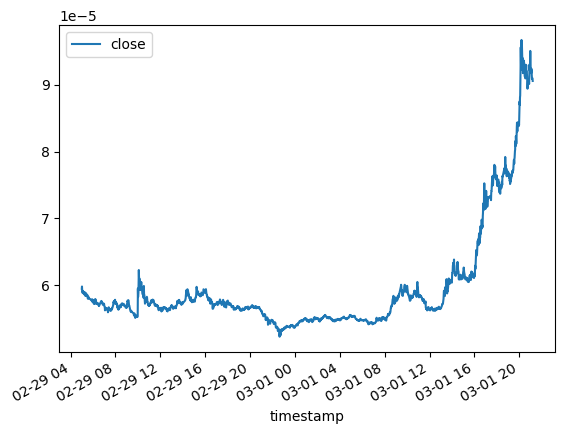

In [188]:
df_feature, df_trading = algo.jitter_recovery.research.investigate_symbol(df, symbol_investigate, jitter_recovery_trading_param, figsize=(12, 11))

In [378]:
df_trading[
    (df_trading.index >=  '2024-01-03 12:14:00') &
    (df_trading.index <=  '2024-01-03 12:18:00')
]

,avg_v_before_max_ch,avg_v_before_min_ch,ch,ch_max,ch_min,ch_since_max,ch_since_min,distance_max_ch,distance_min_ch,v_ch_max_is_from,...,timedelta_since_position_enter,v_ch_max_is_to_when_enter,v_ch_min_is_to_when_enter,v_ch_max_is_from_when_enter,v_ch_min_is_from_when_enter,ch_from_enter,ch_from_lowest_since_enter,position_changed,profit_raw,profit
timestamp,,,,,,,,,,,,,,,,,,,,,


In [146]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:27:00,1.7395,1,1.0,0.000,0.000000
2024-01-03 12:29:00,1.8060,0,-1.0,-0.016,-0.008939


In [147]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:27:00, ARB-USDT-SWAP, 1.7395, position_changed: 1.0
2024-01-03 12:28:00, ARB-USDT-SWAP, 1.79, position_changed: -1.0
